In [3]:
#mount GDrive
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import os

os.chdir("/content/gdrive/My Drive/data/hershey_data")

In [5]:
import pickle as pic
import numpy as np
raw_data = pic.load(open("./data_batch_0","rb"),encoding="bytes")

In [6]:
in_data = raw_data['sG_data']
labels = raw_data['sG_labels']
print(len(labels))

1549


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import add
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import SGD
#residual module
#residual module
def res_module(inp):
    if not inp.shape[-1] == 64:
        #project with 1x1 convolution
        inp = Conv2D(64,1,activation="relu")(inp)
    x = BatchNormalization()(inp)
    x = Activation("relu")(x)
    x = Conv2D(16, 3,padding="same",activation="sigmoid")(x)
    x = Conv2D(32, 3,padding="same",activation="sigmoid")(x)
    x = Conv2D(64, 3,padding="same",activation="sigmoid")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(16, 3,padding="same",activation="sigmoid")(x)
    x = Conv2D(32, 3,padding="same",activation="sigmoid")(x)
    x = Conv2D(64, 3,padding="same",activation="sigmoid")(x)
    out = add([x, inp])
    return out

#two block res module
inp = Input(shape=(95, 60, 4))
x_a = res_module(inp)
x_a = res_module(x_a)
x_a = res_module(x_a)
x_a = res_module(x_a)
x_a = MaxPooling2D(7)(x_a)
x_a = Flatten()(x_a)
out = Dense(5700,activation='softmax')(x_a)
# create model
model = Model(inputs=inp, outputs=out)
# summarize model
model.summary()


Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 95, 60, 4)]  0                                            
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, 95, 60, 64)   320         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 95, 60, 64)   256         conv2d_150[0][0]                 
__________________________________________________________________________________________________
activation_48 (Activation)      (None, 95, 60, 64)   0           batch_normalization_48[0][0]     
______________________________________________________________________________________

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model.fit(in_data,labels,epochs=30)

Epoch 1/30
49/49 [==============================] - 16s 336ms/step - loss: 5.2705 - accuracy: 0.0433
Epoch 2/30
49/49 [==============================] - 16s 335ms/step - loss: 4.8393 - accuracy: 0.0897
Epoch 3/30
49/49 [==============================] - 16s 334ms/step - loss: 4.3559 - accuracy: 0.1440
Epoch 4/30
49/49 [==============================] - 16s 334ms/step - loss: 3.8911 - accuracy: 0.2085
Epoch 5/30
49/49 [==============================] - 16s 334ms/step - loss: 3.4675 - accuracy: 0.2912
Epoch 6/30
49/49 [==============================] - 16s 334ms/step - loss: 3.1217 - accuracy: 0.3247
Epoch 7/30
49/49 [==============================] - 16s 334ms/step - loss: 2.8133 - accuracy: 0.3680
Epoch 8/30
49/49 [==============================] - 16s 334ms/step - loss: 2.5564 - accuracy: 0.3990
Epoch 9/30
49/49 [==============================] - 16s 333ms/step - loss: 2.3307 - accuracy: 0.4403
Epoch 10/30
49/49 [==============================] - 16s 334ms/step - loss: 2.1386 - accura

In [58]:
pred_img = model.predict(in_data[200:220])
actual_imgs = labels[200:220]

In [63]:
for pred,img in zip(pred_img,actual_imgs):
  print("predicted : ",np.argmax(pred),"actual : ",np.argmax(img),"pred : ",pred[np.argmax(pred)],"actual : ",img[np.argmax(img)])


predicted :  3394 actual :  3394 pred :  0.969028 actual :  1.0
predicted :  2744 actual :  2611 pred :  0.41674203 actual :  1.0
predicted :  2612 actual :  2612 pred :  0.94489825 actual :  1.0
predicted :  2620 actual :  2620 pred :  0.75629926 actual :  1.0
predicted :  2609 actual :  2609 pred :  0.92785406 actual :  1.0
predicted :  2617 actual :  2617 pred :  0.89943004 actual :  1.0
predicted :  3393 actual :  3393 pred :  0.79716814 actual :  1.0
predicted :  3218 actual :  3218 pred :  0.9818295 actual :  1.0
predicted :  3033 actual :  3033 pred :  0.96911544 actual :  1.0
predicted :  2323 actual :  2323 pred :  0.81327635 actual :  1.0
predicted :  2324 actual :  2324 pred :  0.9798249 actual :  1.0
predicted :  2735 actual :  2735 pred :  0.29611015 actual :  1.0
predicted :  2736 actual :  2736 pred :  0.58262074 actual :  1.0
predicted :  3098 actual :  2732 pred :  0.1712511 actual :  1.0
predicted :  3572 actual :  3572 pred :  0.9261287 actual :  1.0
predicted :  268

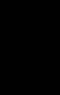

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
float32
1.0
